# Aula 4 - Machine Learning

# Demo 7 - K-Means

## Agrupamento com K-Means e Método do Cotovelo (Elbow Method)

### Prof Dr. Ahirton Lopes (profahirton.lopes@fiap.com.br)

Importando nossas bibliotecas

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.DataFrame(np.random.random_sample((100,2)),columns= ['Atributo_1','Atributo_2'])
df.head()

,Atributo_1,Atributo_2
0,0.885598,0.875546
1,0.335257,0.685902
2,0.325237,0.759372
3,0.685899,0.885723
4,0.015072,0.415196


#### Normalizando os dados com auxílio do Standard Scaler

In [3]:
mms = StandardScaler()
mms.fit(df)
normalized_data = mms.transform(df)

### Aplicando o Método do Cotovelo, de modo a achar um número ideal de clusters

In [4]:
plt.figure(figsize=(8,5))

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

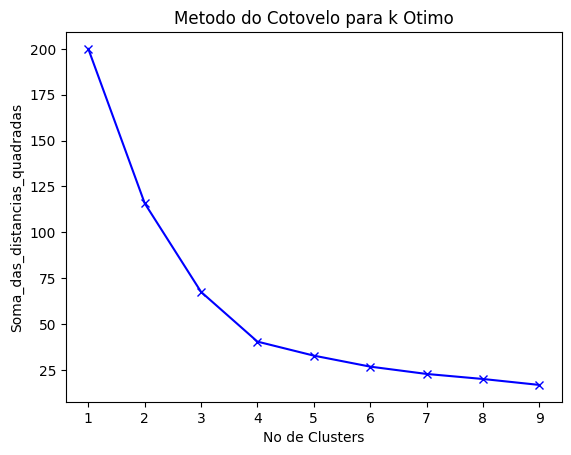

In [5]:
K = range(1,10)
Sum_of_squared_distances = []
for k in K:
    km = KMeans(n_clusters=k, n_init=10)
    km = km.fit(normalized_data)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('No de Clusters')
plt.ylabel('Soma_das_distancias_quadradas')
plt.title('Metodo do Cotovelo para k Otimo')
plt.show()

### Baseado no resultado - começar com 4 clusters

In [6]:
km = KMeans(n_clusters=4, n_init=10)
km = km.fit(normalized_data)

### Adicionando rótulos ao dataset

In [7]:
df['rotulos'] = km.labels_
df.head()

,Atributo_1,Atributo_2,rotulos
0,0.885598,0.875546,2
1,0.335257,0.685902,0
2,0.325237,0.759372,0
3,0.685899,0.885723,2
4,0.015072,0.415196,3


### Visualizando nossos clusters via Box plot

Como temos somente dois atributos gerados de forma randômica, os 4 clusters possíveis são:

1.	altos valores de atributo 1 e altos valores para atributo 2
2.	 altos valores de atributo 1 e baixos valores para atributo 2
3.	baixos valores de atributo 1 e altos valores para atributo 2
4.	baixoa valores para atributo 1 e baixos valores para atributo 2


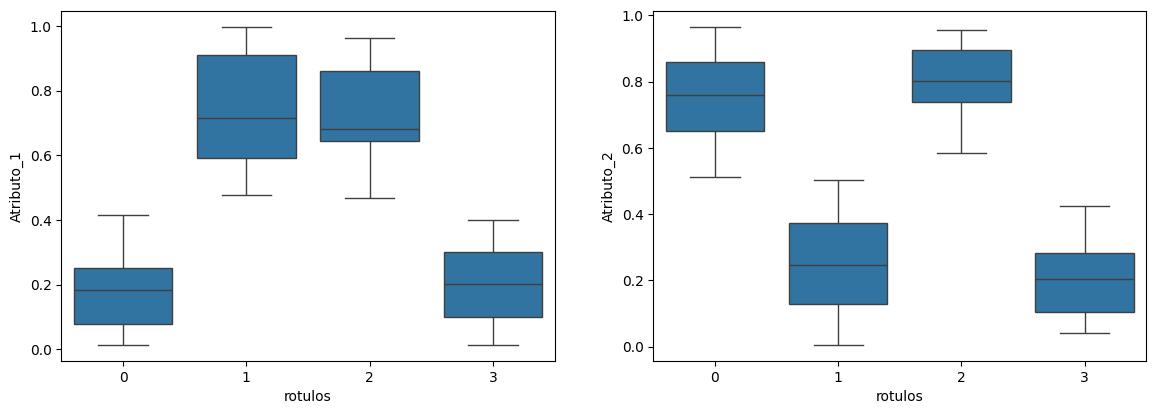

In [8]:
fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.boxplot(x="rotulos", y="Atributo_1", data=df)
ax2 = fig.add_subplot(2,2,2)
ax2 = sns.boxplot(x="rotulos", y="Atributo_2", data=df)

<Axes: xlabel='Atributo_1', ylabel='Atributo_2'>

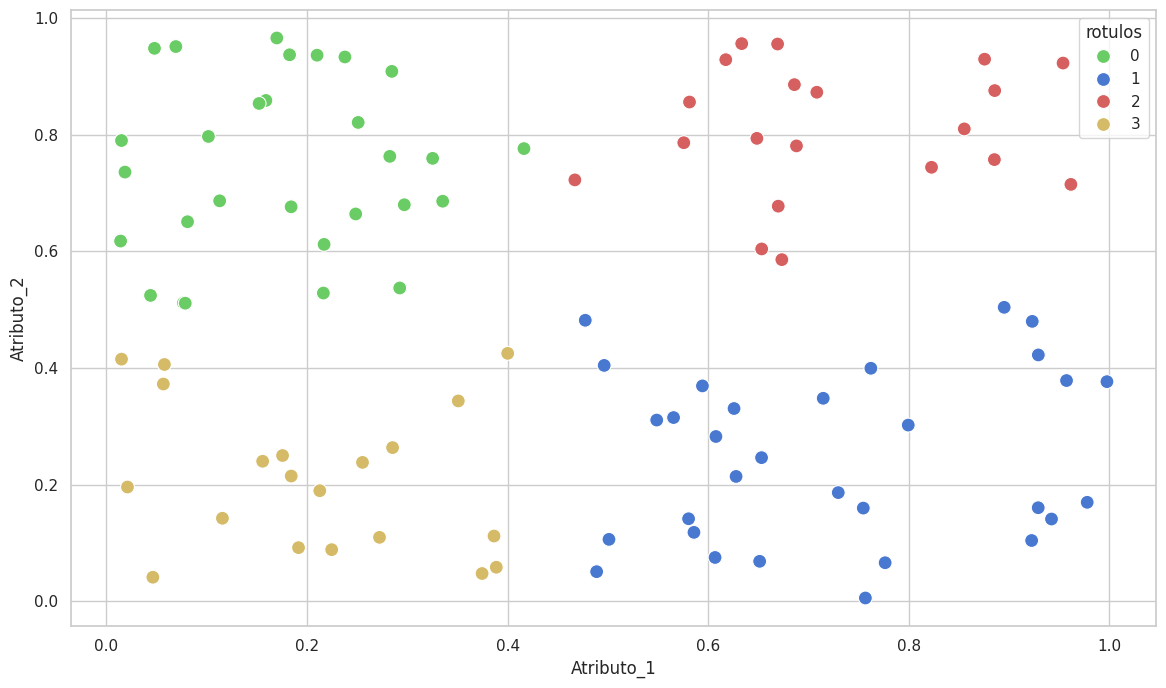

In [9]:
plt.figure(figsize=(14,8))
sns.set(style="whitegrid", palette="muted")
sns.scatterplot(x="Atributo_1", y="Atributo_2", hue="rotulos",s=100,
                     data=df,palette={0: 'g', 1 : 'b', 2 : 'r',3 : 'y'})